In [1]:
%load_ext autoreload
%autoreload 2

import os
from jax import config
config.update("jax_enable_x64", True)

os.environ["CUDA_DEVICE_ORDER"] = "PCI_BUS_ID" 
os.environ["CUDA_VISIBLE_DEVICES"] = '1'
from encoding_information.gpu_utils import limit_gpu_memory_growth
limit_gpu_memory_growth()

import tensorflow_datasets as tfds  # TFDS for MNIST
import tensorflow as tf             # TensorFlow operations

# from image_distribution_models import PixelCNN

from cleanplots import *
import jax.numpy as np
from jax.scipy.special import logsumexp
import numpy as onp

/home/hpinkard_waller/mambaforge/envs/encoding_info/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
2024-04-12 10:33:22.229105: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
#MNIST
(patches, _), (test_patches, _) = tf.keras.datasets.mnist.load_data()
eigenvalue_floor = 1e0

patches = patches[:, :14, :14]
patches = patches * 3  + 40

test_patches = test_patches[:, :14, :14]
test_patches = test_patches * 3  + 40


In [5]:
from encoding_information.bsccm_utils import *
from encoding_information.image_utils import *

bsccm = BSCCM('/home/hpinkard_waller/data/BSCCM/')

# load images, extract patches, and compute cov mats
edge_crop = 32
patch_size = 10
num_images = 20000
num_images = 1000

# channel = 'LED119'
channel = 'DPC_Right'
eigenvalue_floor = 1e-3

num_test_images = 500

all_images = load_bsccm_images(bsccm, channel=channel, num_images=num_images + num_test_images, edge_crop=edge_crop, median_filter=False)
images = all_images[:num_images]
test_images = all_images[num_images:]
test_patches = extract_patches(test_images, patch_size, num_patches=num_test_images, seed=0)

num_patches = 5000
seed = 10

patches = extract_patches(images, patch_size, num_patches=num_patches, seed=seed)


Opening BSCCM
Opened BSCCM


In [3]:
from encoding_information.models.gaussian_process import StationaryGaussianProcess

stationary_gp = StationaryGaussianProcess(patches, eigenvalue_floor=eigenvalue_floor)
val_loss_history = stationary_gp.fit(patches, max_epochs=5, eigenvalue_floor=eigenvalue_floor)          

2024-04-12 10:33:32.917985: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1956] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


Initial validation NLL: 4.90


Epoch 1: 100%|██████████| 1/1 [00:05<00:00,  5.40s/it]


Epoch 1: validation NLL: 4.90


Epoch 2: 100%|██████████| 1/1 [00:00<00:00, 38.77it/s]


Epoch 2: validation NLL: 4.90


Epoch 3: 100%|██████████| 1/1 [00:00<00:00,  9.45it/s]


Epoch 3: validation NLL: 4.90


Epoch 4: 100%|██████████| 1/1 [00:00<00:00, 40.49it/s]


Epoch 4: validation NLL: 4.90


Epoch 5: 100%|██████████| 1/1 [00:00<00:00,  8.73it/s]


Epoch 5: validation NLL: 4.90


Initial validation NLL: 6.25


Epoch 1: 100%|██████████| 100/100 [00:08<00:00, 11.68it/s]


Epoch 1: validation NLL: 1.86


Epoch 2: 100%|██████████| 100/100 [00:01<00:00, 68.39it/s]


Epoch 2: validation NLL: 1.67


Epoch 3: 100%|██████████| 100/100 [00:01<00:00, 71.77it/s]


Epoch 3: validation NLL: 1.63


Epoch 4: 100%|██████████| 100/100 [00:01<00:00, 71.40it/s]


Epoch 4: validation NLL: 1.61


Epoch 5: 100%|██████████| 100/100 [00:01<00:00, 72.56it/s]


Epoch 5: validation NLL: 1.61


Epoch 6: 100%|██████████| 100/100 [00:01<00:00, 66.19it/s]


Epoch 6: validation NLL: 1.60


Epoch 7: 100%|██████████| 100/100 [00:01<00:00, 69.63it/s]


Epoch 7: validation NLL: 1.59


Epoch 8: 100%|██████████| 100/100 [00:01<00:00, 71.52it/s]


Epoch 8: validation NLL: 1.59


Epoch 9: 100%|██████████| 100/100 [00:01<00:00, 71.83it/s]


Epoch 9: validation NLL: 1.58


Epoch 10: 100%|██████████| 100/100 [00:01<00:00, 71.74it/s]


Epoch 10: validation NLL: 1.58


Epoch 11: 100%|██████████| 100/100 [00:01<00:00, 72.07it/s]


Epoch 11: validation NLL: 1.57


Epoch 12: 100%|██████████| 100/100 [00:01<00:00, 71.78it/s]


Epoch 12: validation NLL: 1.57


Epoch 13: 100%|██████████| 100/100 [00:01<00:00, 71.81it/s]


Epoch 13: validation NLL: 1.56


Epoch 14: 100%|██████████| 100/100 [00:01<00:00, 71.31it/s]


Epoch 14: validation NLL: 1.56


Epoch 15: 100%|██████████| 100/100 [00:01<00:00, 70.01it/s]


Epoch 15: validation NLL: 1.56


Epoch 16: 100%|██████████| 100/100 [00:01<00:00, 71.61it/s]


Epoch 16: validation NLL: 1.55


Epoch 17: 100%|██████████| 100/100 [00:01<00:00, 68.29it/s]


Epoch 17: validation NLL: 1.55


Epoch 18: 100%|██████████| 100/100 [00:01<00:00, 63.64it/s]


Epoch 18: validation NLL: 1.55


Epoch 19: 100%|██████████| 100/100 [00:01<00:00, 71.23it/s]


Epoch 19: validation NLL: 1.55


Epoch 20: 100%|██████████| 100/100 [00:01<00:00, 69.72it/s]


Epoch 20: validation NLL: 1.54


Epoch 21: 100%|██████████| 100/100 [00:01<00:00, 69.98it/s]


Epoch 21: validation NLL: 1.54


Epoch 22: 100%|██████████| 100/100 [00:01<00:00, 70.53it/s]


Epoch 22: validation NLL: 1.55


Epoch 23: 100%|██████████| 100/100 [00:01<00:00, 68.70it/s]


Epoch 23: validation NLL: 1.54


Epoch 24: 100%|██████████| 100/100 [00:01<00:00, 69.27it/s]


Epoch 24: validation NLL: 1.53


Epoch 25: 100%|██████████| 100/100 [00:01<00:00, 69.58it/s]


Epoch 25: validation NLL: 1.54


Epoch 26: 100%|██████████| 100/100 [00:01<00:00, 69.37it/s]


Epoch 26: validation NLL: 1.53


Epoch 27: 100%|██████████| 100/100 [00:01<00:00, 70.14it/s]


Epoch 27: validation NLL: 1.53


Epoch 28: 100%|██████████| 100/100 [00:01<00:00, 68.96it/s]


Epoch 28: validation NLL: 1.53


Epoch 29: 100%|██████████| 100/100 [00:01<00:00, 69.25it/s]


Epoch 29: validation NLL: 1.53


Epoch 30: 100%|██████████| 100/100 [00:01<00:00, 67.65it/s]


Epoch 30: validation NLL: 1.52


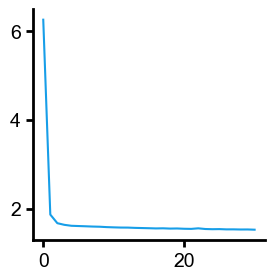

In [4]:
from encoding_information.models.pixel_cnn import PixelCNN

num_hidden_channels = 64
num_mixture_components = 40

pixel_cnn = PixelCNN(num_hidden_channels=num_hidden_channels, num_mixture_components=num_mixture_components)
val_loss_history = pixel_cnn.fit(patches, max_epochs=30)          

fig, ax = plt.subplots(figsize=(3, 3))
ax.plot(val_loss_history)
clear_spines(ax)


In [5]:
from encoding_information.models.gaussian_process import FullGaussianProcess

full_gaussian = FullGaussianProcess(patches, eigenvalue_floor=eigenvalue_floor, verbose=True)

computing full covariance matrix
computing mean vector


## Compare test set likelihood and samples from both models

In [10]:
stationary_gp_nll = stationary_gp.compute_negative_log_likelihood(test_patches)
pixel_cnn_nll = pixel_cnn.compute_negative_log_likelihood(test_patches)
full_gaussian_nll = full_gaussian.compute_negative_log_likelihood(test_patches)
print(f"Stationary GP NLL: {stationary_gp_nll}")
print(f"PixelCNN NLL: {pixel_cnn_nll}")
print(f"Full Gaussian NLL: {full_gaussian_nll}")

Stationary GP NLL: 4.921732451858828
PixelCNN NLL: 1.5433945655822754
Full Gaussian NLL: 3.5752949714660645


In [7]:
num_samples = 8

gp_samples = stationary_gp.generate_samples(num_samples)
pixel_cnn_samples = pixel_cnn.generate_samples(num_samples)
full_gp_samples = full_gaussian.generate_samples(num_samples)

Generating PixelCNN samples:   0%|          | 0/14 [00:00<?, ?it/s]2024-04-12 10:37:03.906298: W external/xla/xla/service/gpu/conv_algorithm_picker.cc:808] None of the algorithms provided by cuDNN heuristics worked; trying fallback algorithms.
2024-04-12 10:37:03.906335: W external/xla/xla/service/gpu/conv_algorithm_picker.cc:811] Conv: (f64[8,128,14,14]{3,2,1,0}, u8[0]{0}) custom-call(f64[8,64,14,14]{3,2,1,0}, f64[128,64,3,3]{3,2,1,0}), window={size=3x3 pad=1_1x1_1}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convForward", backend_config={"conv_result_scale":1,"activation_mode":"kNone","side_input_scale":0,"leakyrelu_alpha":0}
Generating PixelCNN samples: 100%|██████████| 14/14 [01:00<00:00,  4.29s/it]


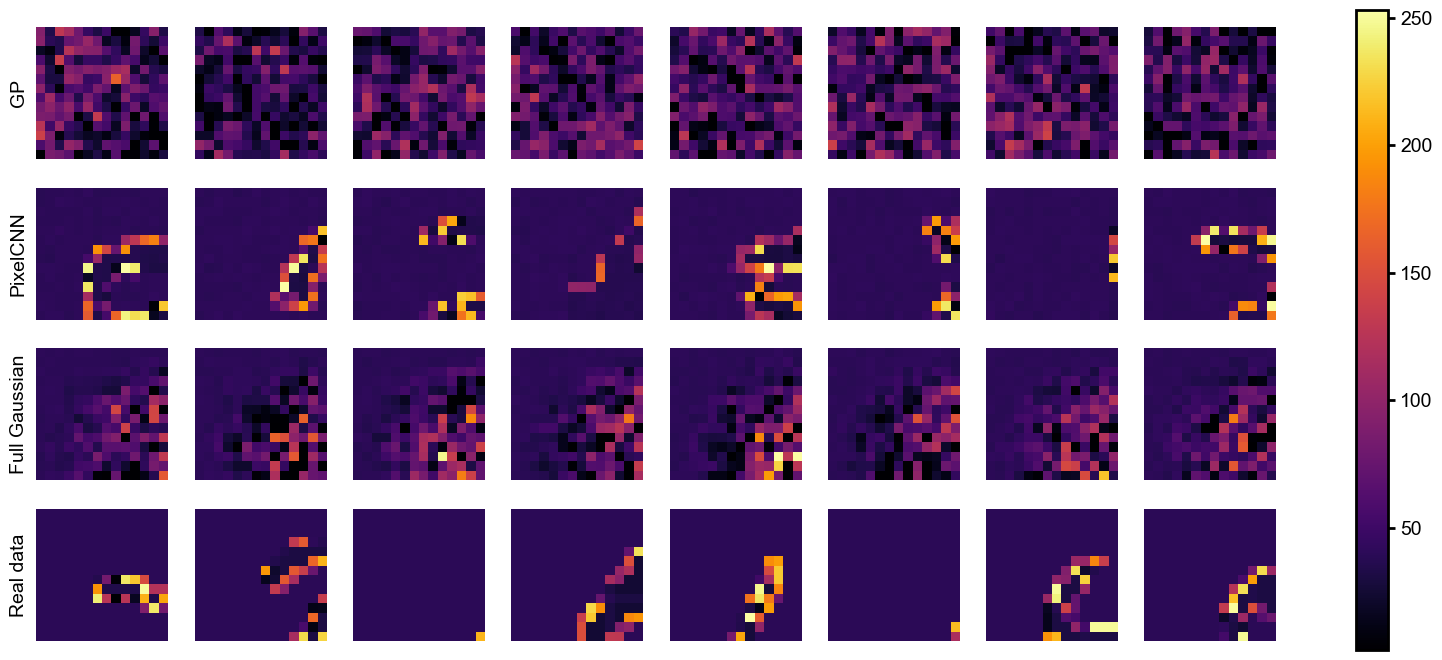

In [8]:
# plot samples
fig, axes = plt.subplots(4, len(gp_samples), figsize=(2 * len(gp_samples), 8))

vmin, vmax = np.percentile(patches, 0.1), np.percentile(patches, 99.9)
# vmin, vmax = np.percentile(gp_samples, 0.5), np.percentile(gp_samples, 99.5)

for i, (gp_sample, pixel_cnn_sample, full_gp_sample) in enumerate(zip(gp_samples, pixel_cnn_samples, full_gp_samples)):
    axes[0, i].imshow(gp_sample, cmap='inferno', vmin=vmin, vmax=vmax)
    axes[1, i].imshow(pixel_cnn_sample, cmap='inferno', vmin=vmin, vmax=vmax)
    axes[2, i].imshow(full_gp_sample, cmap='inferno', vmin=vmin, vmax=vmax)
    im = axes[3, i].imshow(test_patches[i], cmap='inferno', vmin=vmin, vmax=vmax)
    axes[0, i].axis('off')
    axes[1, i].axis('off')
    axes[2, i].axis('off')
    axes[3, i].axis('off')

# add colorbar
cbar_ax = fig.add_axes([0.95, 0.1, 0.02, 0.8])
fig.colorbar(im, cax=cbar_ax)

# add text to the left side of each row
for i, label in enumerate(['GP', 'PixelCNN', 'Full Gaussian', 'Real data']):
    axes[i, 0].text(-0.2, 0.5, label, transform=axes[i, 0].transAxes, va='center', rotation='vertical', fontsize=14)